In [1]:
%matplotlib inline
import re
import json
import mca
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.spatial.distance import cosine

http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/  
https://pypi.org/project/mca/

In [2]:
datadir = '/Users/klarnemann/Documents/Insight/Insight_project/data'
figdir = '/Users/klarnemann/Documents/Insight/Insight_project/docs/figures'

In [3]:
poi_category_df_f = '%s/poi_museums_and_parks.xlsx' % (datadir)
poi_category_df = pd.read_excel(poi_category_df_f, index_col=0)

In [4]:
category_df_f = '%s/poi_by_city_museums_and_parks.xlsx' % (datadir)
category_df = pd.read_excel(category_df_f, index_col=0)

In [5]:
poi_category_df.head()

,Unnamed: 0.1,Name,Location,All_categories,Agriculture,Airport,Anthropology/Archaeology,Area Resources,Area Shopping,Art,...,Snorkeling,Sport,Surfing,Swimming,Technology,Textile,Trails,Transportation,Visitors Center,Zoo/Aquarium
0,0,Alabama Administrative Office of Courts Museum...,"Montgomery, Alabama","['Industry', 'Public service']",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Alabama Artists Gallery,"Montgomery, Alabama",['Art'],0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Alabama Constitution Village,"Huntsville, Alabama","['History', 'Open air']",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Alabama Department of Archives and History,"Montgomery, Alabama",['History'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Alabama Governor's Mansion,"Montgomery, Alabama",['Historic house'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
category_df.head()

,POI_names,All_categories,Agriculture,Anthropology/Archaeology,Art,Biography,Children's,Commodity,Entertainment/Media,Heritage,...,Nature of the Area,Nearby Accommodations,Picnicking,Rock Climbing and Rappelling,Scuba Diving,Snorkeling,Surfing,Swimming,Trails,Visitors Center
Location,,,,,,,,,,,,,,,,,,,,,
"Aaronsburg, Pennsylvania",['Penns Valley Area Historical Museum'],['Local history'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abbeville, Louisiana","['Abbeville Museum', 'Louisiana Military Hall ...","['History', 'Military', 'Camping']",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abbeville, South Carolina",['Burt-Stark Mansion'],['Historic house'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abbot, Maine",['Abbot Historical Society Museum'],['Local history'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abercrombie, North Dakota",['Fort Abercrombie State Historic Site'],['Military'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Functions

In [7]:
def compute_pairwise_cosine_distance(data):
    n_cities, _ = data.shape
    out_mat = np.zeros(shape=(n_cities, n_cities))
    for i in np.arange(n_cities):
        if i % 200 == 0:
            print(i)
        for j in np.arange(n_cities):
            if i < j:
                out_mat[i,j] = cosine(data[i,:], data[j,:])
    return out_mat

# K-Means Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#elbow-method

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [62]:
data = np.array(category_df[category_df.columns[3:]])

In [28]:
kmeans_stats = []

In [29]:
for k in np.linspace(5,1000,200, dtype=int):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    score = silhouette_avg = silhouette_score(data, kmeans.labels_)
    inertia = kmeans.inertia_
    kmeans_stats.append([k, score, inertia])

In [30]:
#kmeans_silhouette = np.array(kmeans_silhouette)
#kmeans_silhouette.shape
kmeans_stats = np.array(kmeans_stats)
kmeans_stats.shape

(200, 3)

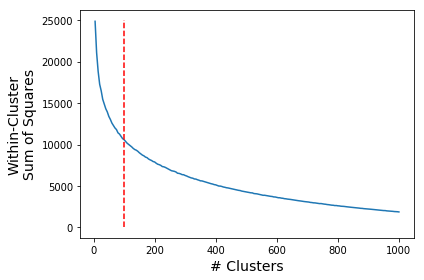

In [41]:
plt.figure(figsize=(6,4))
plt.plot(kmeans_stats[:,0], kmeans_stats[:,2])
plt.plot([100,100], [0,25000], 'r--')
plt.xlabel('# Clusters', fontsize=14)
plt.ylabel('Within-Cluster\nSum of Squares', fontsize=14)
plt.tight_layout()
plt.savefig('%s/plot_elbow_kmeans_categorical_by_city.png' % (figdir))

In [44]:
kmeans_100 = KMeans(n_clusters=100, random_state=0).fit(data)
kmeans_labels = kmeans_100.labels_

# Multiple Correspondence Analysis

In [8]:
print(mca.MCA.__doc__)

Run MCA on selected columns of a pd DataFrame.
	
	If the column are specified, assume that they hold
	categorical variables that need to be replaced with
	dummy indicators, otherwise process the DataFrame as is.

	'cols': The columns of the DataFrame to process.
	'ncols': The number of columns before dummy coding. To be passed if cols isn't.
	'benzecri': Perform Benzécri correction (default: True)
	'TOL': value below which to round eigenvalues to zero (default: 1e-4)
	


In [9]:
category_df.columns[3:]

Index(['Anthropology/Archaeology', 'Art', 'Biography', 'Children's',
       'Commodity', 'Entertainment/Media', 'Heritage', 'Historic house',
       'Historic site', 'History', 'Industry', 'Literary', 'Local history',
       'Military', 'Natural history', 'Open air', 'Public service',
       'Religious', 'Science', 'Sport', 'Technology', 'Textile',
       'Transportation', 'Zoo/Aquarium', 'Airport', 'Area Resources',
       'Area Shopping', 'Attractions', 'Beaches', 'Bicycling', 'Birding',
       'Boating', 'Cabins', 'Camping', 'Canoeing', 'Cottages',
       'Cross-country Skiing', 'Fishing', 'Geocaching', 'Golf Course',
       'History of the Area', 'Lodge', 'Marinas', 'Nature Programs',
       'Nature of the Area', 'Nearby Accommodations', 'Picnicking',
       'Rock Climbing and Rappelling', 'Scuba Diving', 'Snorkeling', 'Surfing',
       'Swimming', 'Trails', 'Visitors Center'],
      dtype='object')

In [10]:
mca_ben = mca.MCA(category_df[category_df.columns[3:]])

In [11]:
fs_cols = mca_ben.fs_c()
print(fs_cols.shape)

(54, 21)


In [ ]:
fs_cols

In [12]:
fs_rows = mca_ben.fs_r()
fs_rows.shape

(8388, 21)

In [ ]:
fs_cosine_mat = compute_pairwise_cosine_distance(np.array(fs_rows))

In [153]:
fs_cosine_mat[np.isnan(fs_cosine_mat)] = 0.

In [14]:
expl_var_by_row = mca_ben.expl_var()

In [15]:
n_factors= len(expl_var_by_row)

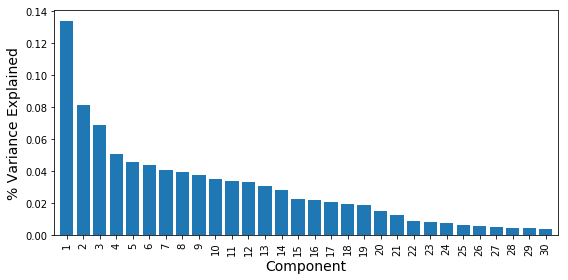

In [248]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(n_factors)[:30], expl_var_by_row[:30]);
plt.xlim(-0.75, 29.75)
plt.xticks(np.arange(n_factors)[:30], np.arange(n_factors)[1:31], rotation=90);
plt.xlabel('Component', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14);
plt.tight_layout()
plt.savefig('%s/bar_mca_explained_variance_factors.png' % (figdir), dpi=150, transparent=True)

~~~
for i, col in enumerate(poi_by_city.columns[2:]):
    tmp_data = list(fs_cols[i,:])
    max_val = np.max(tmp_data)
    max_col_1 = tmp_data.index(max_val)
    tmp_data[max_col_1] = 0
    max_val = np.max(tmp_data)
    max_col_2 = tmp_data.index(max_val)
    print(col, max_col_1, max_col_2)
~~~

In [6]:
museum_cats = category_df.columns[2:27]
park_cats = category_df.columns[27:]
museums = category_df[museum_cats].sum(axis=1)
parks = category_df[park_cats].sum(axis=1)

In [7]:
n_cities = float(len(category_df.index))

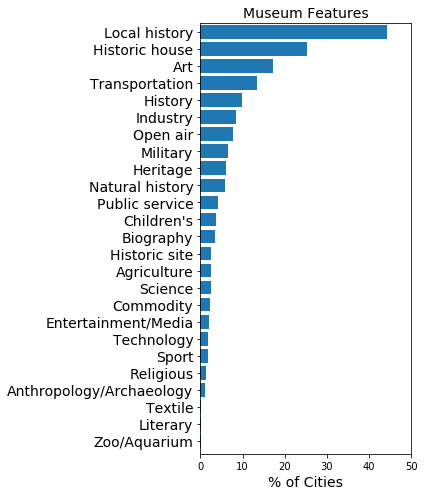

In [18]:
vals = category_df[museum_cats].sum(axis=0).sort_values(ascending=True)/n_cities*100
xlabels = list(category_df[museum_cats].sum(axis=0).sort_values(ascending=True).index)

plt.figure(figsize=(6,7))
plt.barh(np.arange(len(xlabels)), vals);
plt.xlim(0,50);
plt.ylim(-0.75,len(xlabels)-0.5)
plt.yticks(np.arange(len(xlabels)), xlabels, fontsize=14);
plt.xlabel('% of Cities', fontsize=14)
plt.title('Museum Features', fontsize=14)
plt.tight_layout()
plt.savefig('%s/bar_pct_museum_features_by_city.png' % (figdir), dpi=150, transparent=True)

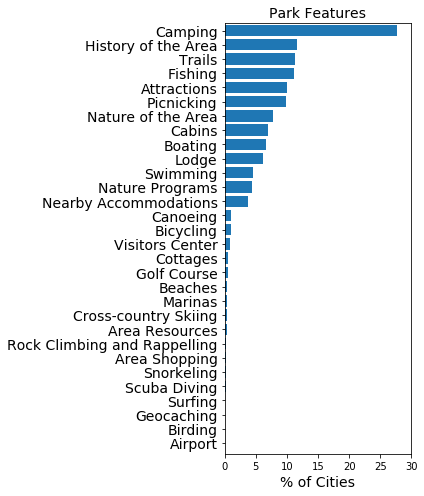

In [17]:
vals = category_df[park_cats].sum(axis=0).sort_values(ascending=True)/n_cities*100
xlabels = list(category_df[park_cats].sum(axis=0).sort_values(ascending=True).index)

plt.figure(figsize=(6,7))
plt.barh(np.arange(len(xlabels)), vals);
plt.xlim(0,30)
plt.ylim(-0.75,len(xlabels)-0.5)
plt.yticks(np.arange(len(xlabels)), xlabels, fontsize=14);
plt.xlabel('% of Cities', fontsize=14)
plt.title('Park Features', fontsize=14)
plt.tight_layout()
plt.savefig('%s/bar_pct_park_features_by_city.png' % (figdir), dpi=150, transparent=True)

In [147]:
category_df.columns

Index(['POI_names', 'All_categories', 'Agriculture',
       'Anthropology/Archaeology', 'Art', 'Biography', 'Children's',
       'Commodity', 'Entertainment/Media', 'Heritage', 'Historic house',
       'Historic site', 'History', 'Industry', 'Literary', 'Local history',
       'Military', 'Natural history', 'Open air', 'Public service',
       'Religious', 'Science', 'Sport', 'Technology', 'Textile',
       'Transportation', 'Zoo/Aquarium', 'Airport', 'Area Resources',
       'Area Shopping', 'Attractions', 'Beaches', 'Bicycling', 'Birding',
       'Boating', 'Cabins', 'Camping', 'Canoeing', 'Cottages',
       'Cross-country Skiing', 'Fishing', 'Geocaching', 'Golf Course',
       'History of the Area', 'Lodge', 'Marinas', 'Nature Programs',
       'Nature of the Area', 'Nearby Accommodations', 'Picnicking',
       'Rock Climbing and Rappelling', 'Scuba Diving', 'Snorkeling', 'Surfing',
       'Swimming', 'Trails', 'Visitors Center'],
      dtype='object')

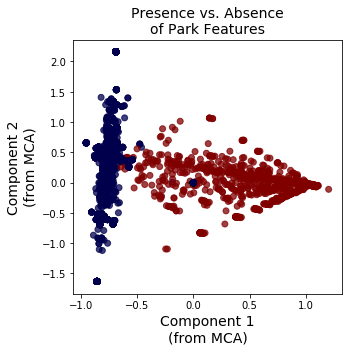

In [198]:
plt.figure(figsize=(5,5))
plt.scatter(fs_data[:,0], fs_data[:,1], c=np.array(parks.values>0), 
            cmap='seismic', alpha=0.75)
plt.title('Presence vs. Absence\nof Park Features', fontsize=14)
plt.xlabel('Component 1\n(from MCA)', fontsize=14)
plt.ylabel('Component 2\n(from MCA)', fontsize=14)
plt.tight_layout()
plt.savefig('%s/scatter_mca_componenet_1_vs_2_parks.png' % (figdir))

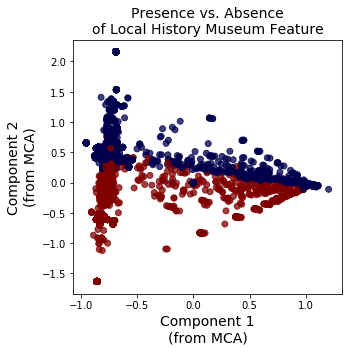

In [245]:
plt.figure(figsize=(5,5))
plt.scatter(fs_data[:,0], fs_data[:,1], c=np.array(category_df['Local history']>0), 
            cmap='seismic', alpha=0.75)
plt.title('Presence vs. Absence\nof Local History Museum Feature', fontsize=14)
plt.xlabel('Component 1\n(from MCA)', fontsize=14)
plt.ylabel('Component 2\n(from MCA)', fontsize=14)
plt.tight_layout()
plt.savefig('%s/scatter_mca_componenet_1_vs_2_local_history.png' % (figdir))

## K-Means

In [47]:
fs_data = fs_rows

In [48]:
fs_kmeans_stats = []

In [49]:
for k in np.linspace(5,1000,200, dtype=int):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(fs_data)
    score = silhouette_avg = silhouette_score(fs_data, kmeans.labels_)
    inertia = kmeans.inertia_
    fs_kmeans_stats.append([k, score, inertia])

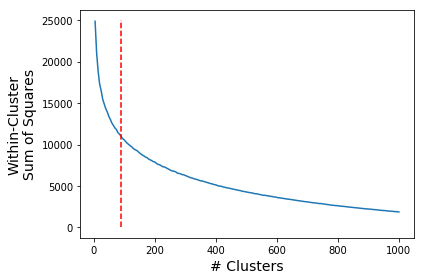

In [59]:
plt.figure(figsize=(6,4))
plt.plot(fs_kmeans_stats[:,0], fs_kmeans_stats[:,2])
plt.plot([90,90], [0,25000], 'r--')
plt.xlabel('# Clusters', fontsize=14)
plt.ylabel('Within-Cluster\nSum of Squares', fontsize=14)
plt.tight_layout()
plt.savefig('%s/plot_elbow_kmeans_categorical_by_city_fs.png' % (figdir))

In [ ]:
score_results = []

In [64]:
for k in np.linspace(5,1000,200, dtype=int):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(fs_data)
    fs_score = silhouette_avg = silhouette_score(fs_data, kmeans.labels_)
    score = silhouette_avg = silhouette_score(data, kmeans.labels_)
    score_results.append([fs_score, score])

In [66]:
score_results = np.array(score_results)

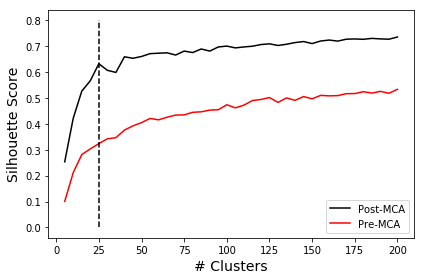

In [195]:
plt.figure(figsize=(6,4))
k_values = np.linspace(5,200,40, dtype=int)
plt.plot(k_values, score_results[:40,0], 'k-', label='Post-MCA')
plt.plot(k_values, score_results[:40,1], 'r-', label='Pre-MCA')
plt.plot([25,25],[0,0.8],'k--')
plt.xlabel('# Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('%s/plot_silhouette_mca_vs_original_by_city_fs.png' % (figdir))

In [184]:
# choose 25 cluster solution using the elbow convention
fs_kmeans = KMeans(n_clusters=25, random_state=0).fit(fs_data)
fs_kmeans_labels = fs_kmeans.labels_

In [271]:
cluster_dict = dict(zip(list(category_df.index), fs_kmeans_labels.astype(str)))
cluster_dict_f = '%s/results/cluster_dict_kmeans_25_mca_21_by_city.json' % (datadir)
with open(cluster_dict_f, 'w') as fp:
    json.dump(cluster_dict, fp, sort_keys=True, indent=4)
#with open(cluster_dict_f, 'r') as fp:
#    cluster_dict = json.load(fp)
#cluster_dict

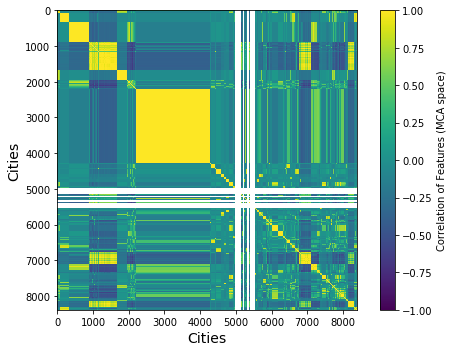

In [249]:
plt.figure(figsize=(7,5))
fs_corr = pd.DataFrame(fs_data[reorder]).T.corr()
plt.imshow(fs_corr)
plt.clim(-1,1)
cbar = plt.colorbar()
cbar.set_label('Correlation of Features (MCA space)')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Cities', fontsize=14)
plt.tight_layout()
plt.savefig('%s/corr_mat_fs-mca_fs.png' % (figdir))

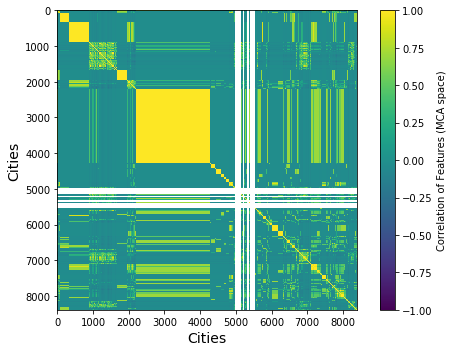

In [250]:
plt.figure(figsize=(7,5))
fs_corr = pd.DataFrame(data[reorder]).T.corr()
plt.imshow(fs_corr)
plt.clim(-1,1)
cbar = plt.colorbar()
cbar.set_label('Correlation of Features (MCA space)')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Cities', fontsize=14)
plt.tight_layout()
plt.savefig('%s/corr_mat_fs-mca.png' % (figdir))

In [187]:
silhouette_score(fs_data, fs_kmeans_labels)

0.6320532258073797

In [188]:
silhouette_score(data, fs_kmeans_labels)

0.32361277511982717

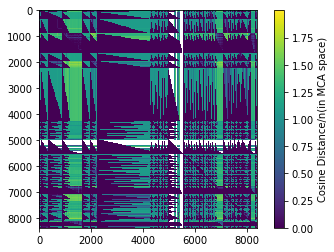

In [83]:
n,_ = fs_cosine_mat.shape
reorder = [x for _,x in sorted(zip(fs_kmeans_labels, np.arange(n)))]
fs_cosine_mat_clusters = fs_cosine_mat.copy()
fs_cosine_mat_clusters = fs_cosine_mat_clusters[reorder,:]
fs_cosine_mat_clusters = fs_cosine_mat_clusters[:,reorder]
plt.imshow(fs_cosine_mat_clusters, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label('Cosine Distance/n(in MCA space)')

### Ward Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

## Latent Corresponce Analysis